In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.dates as md
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

In [2]:
# Stocks
SHOP = pd.read_csv('./Data/E Commerce Stocks/SHOP.csv')
SQ = pd.read_csv('./Data/E Commerce Stocks/SQ.csv')
WIX = pd.read_csv('./Data/E Commerce Stocks/WIX.csv')

# Bonds
BNDX = pd.read_csv('./Data/Bonds/BNDX.csv')
HYG = pd.read_csv('./Data/Bonds/HYG.csv')
LQD = pd.read_csv('./Data/Bonds/LQD.csv')

# Commodities
GLD = pd.read_csv('./Data/Commodities/GLD.csv')
SOYB = pd.read_csv('./Data/Commodities/SOYB.csv')
XOM = pd.read_csv('./Data/Commodities/XOM.csv')
print(XOM)

            Date       Open       High        Low      Close  Adj Close  \
0     2015-11-30  81.419998  82.650002  81.250000  81.660004  64.474442   
1     2015-12-01  81.760002  82.129997  81.269997  81.889999  64.656036   
2     2015-12-02  81.309998  81.639999  79.419998  79.550003  62.808506   
3     2015-12-03  79.720001  79.849998  78.019997  78.410004  61.908424   
4     2015-12-04  77.349998  78.980003  77.029999  78.860001  62.263729   
...          ...        ...        ...        ...        ...        ...   
1254  2020-11-20  37.349998  37.410000  36.779999  36.939999  36.939999   
1255  2020-11-23  37.500000  39.430000  37.279999  39.360001  39.360001   
1256  2020-11-24  40.509998  42.080002  40.220001  41.980000  41.980000   
1257  2020-11-25  41.669998  41.709999  40.650002  40.810001  40.810001   
1258  2020-11-27  40.700001  40.939999  39.869999  40.189999  40.189999   

        Volume  
0     17729200  
1     13917000  
2     16300000  
3     14870300  
4     20156400

In [3]:
columns_to_keep = ['Date', 'Open', 'Close']
SHOP = SHOP[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close']
SQ = SQ[columns_to_keep]
print(SQ)

# SHOP[columns_to_keep].plot()

# x = SHOP['Date']
# y1 = SHOP['Open']
# y2 = SHOP['Close']
# ax = SHOP['Open'].plot()
# ax2 = ax.twinx()
# ax2.plot(y2, color='orange')
# plt.show()


            Date        Open       Close
0     2015-11-30   12.280000   12.040000
1     2015-12-01   12.120000   11.910000
2     2015-12-02   11.970000   11.930000
3     2015-12-03   12.040000   11.920000
4     2015-12-04   11.950000   12.040000
...          ...         ...         ...
1254  2020-11-20  193.690002  195.970001
1255  2020-11-23  200.110001  207.779999
1256  2020-11-24  208.000000  202.899994
1257  2020-11-25  207.449997  212.919998
1258  2020-11-27  215.000000  212.520004

[1259 rows x 3 columns]


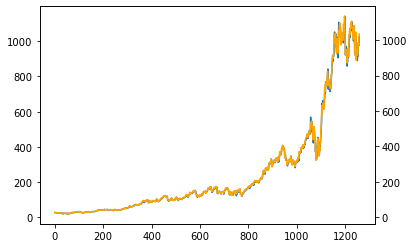

In [4]:
x = SHOP['Date']
y1 = SHOP['Open']
y2 = SHOP['Close']
ax = SHOP['Open'].plot()
ax2 = ax.twinx()
ax2.plot(y2, color='orange')
plt.show()


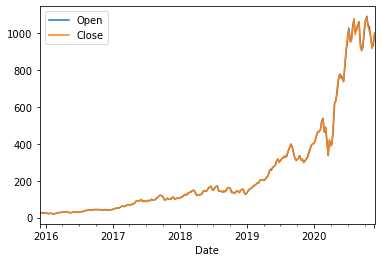

In [5]:
# SHOP.set_index('Date', inplace=True)

# x = SHOP['Date']
# y1 = SHOP['Open']
# y2 = SHOP['Close']
# ax = SHOP['Open'].plot()
# ax2 = ax.twinx()
# ax2.plot(y2, color='orange')
# plt.show()

SHOP['Date']=pd.to_datetime(SHOP['Date'])
SHOP.set_index('Date',inplace=True)
Shop_7D = SHOP.resample('7D').mean()
Shop_7D.plot()


In [6]:
Shop_7D.head()

,Open,Close
Date,,
2015-11-30,26.5500,26.596000
2015-12-07,25.7500,25.577999
2015-12-14,25.4160,25.594000
2015-12-21,24.9075,24.842500
2015-12-28,25.3125,25.450000


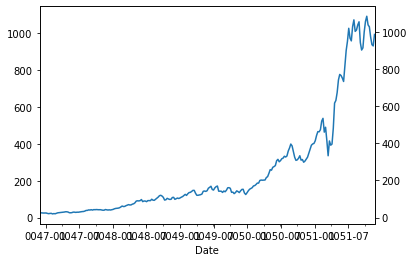

In [7]:
x = Shop_7D.index
y1 = Shop_7D['Open']
y2 = Shop_7D['Close']
ax = Shop_7D['Open'].plot()
ax2 = ax.twinx()
ax2.plot(y2, color='orange')
plt.show()